In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

from effsim.paramgen import uniform_param_generator
from effsim.paramgen import distribution_param_generator
from effsim.effsim import EventSimulator
from effsim.effsim import NoiseMaker

from pytpc.hdfdata import HDFDataFile

import pytpc
from pytpc.tpcplot import pad_plot, chamber_plot
from pytpc.constants import degrees, pi

import csv
import yaml
import h5py

# Generating Parameters

In [7]:
#proton config

with open('../req-files/config_e15503b_p.yml', 'r') as f:
    config_p = yaml.load(f)
    
p_beam_enu0 = config_p['beam_enu0']
p_beam_mass = config_p['beam_mass']
p_beam_charge = config_p['beam_charge']
p_mass_num = config_p['mass_num']
p_max_beam_angle = (config_p['max_beam_angle']*math.pi)/180
p_beam_origin_z = config_p['beam_origin_z']

p_gas = pytpc.gases.InterpolatedGas('isobutane', 19.2)

In [8]:
#carbon config
with open('../req-files/config_e15503b_C.yml', 'r') as f:
    config_C = yaml.load(f)
    
C_beam_enu0 = config_C['beam_enu0']
C_beam_mass = config_C['beam_mass']
C_beam_charge = config_C['beam_charge']
C_mass_num = config_C['mass_num']
C_max_beam_angle = (config_C['max_beam_angle']*math.pi)/180
C_beam_origin_z = config_C['beam_origin_z']

C_gas = pytpc.gases.InterpolatedGas('isobutane', 19.2)

In [9]:
# number of events to create
num_evts = 100

In [10]:
#Generator Python object
pgen = uniform_param_generator(p_beam_enu0, p_beam_mass, p_beam_charge, p_mass_num, p_max_beam_angle, p_beam_origin_z, p_gas, num_evts)
Cgen = uniform_param_generator(C_beam_enu0, C_beam_mass, C_beam_charge, C_mass_num, C_max_beam_angle, C_beam_origin_z, C_gas, num_evts)

In [11]:
# of the form ([x0, y0, z0, enu0, azi0, pol0], [beam vector (3d)])
p1 = next(pgen)
p2 = next(pgen)
p3 = next(pgen)
p4 = next(pgen)
p5 = next(pgen)
p6 = next(pgen)

p_list = [p1, p2, p3, p4, p5, p6]

for p in p_list:
    p[0][0] = 0.0e-0   #x0
    p[0][1] =  0.0e-0    #y0
    p[0][2] = 0.70    #z0
    #p[0][3] = 1.83097548    #enu0
    #p[0][4] =  0.11137931   #azi
    #p[0][5] =  2.01473709   #pol0

print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)

(array([ 0.        ,  0.        ,  0.7       ,  0.84331595,  3.39764937,
        1.86143385]), array([ 0.01399514, -0.00378394, -0.9998949 ]))
(array([ 0.        ,  0.        ,  0.7       ,  2.4851824 ,  5.55324464,
        2.27184878]), array([-0.00721785,  0.02558494, -0.99964659]))
(array([ 0.        ,  0.        ,  0.7       ,  8.65723132,  2.72898374,
        2.85454434]), array([-0.00995939, -0.01418774, -0.99984975]))
(array([  0.        ,   0.        ,   0.7       ,  12.35365981,
         2.27479891,   2.77000389]), array([-0.00150587, -0.01126377, -0.99993543]))
(array([ 0.        ,  0.        ,  0.7       ,  0.74098662,  0.35407718,
        1.86084946]), array([-0.01575013, -0.02036021, -0.99966864]))
(array([ 0.        ,  0.        ,  0.7       ,  0.63321337,  0.53319021,
        2.24930645]), array([ 0.0175756 , -0.02434531, -0.9995491 ]))


In [12]:
# of the form ([x0, y0, z0, enu0, azi0, pol0], [beam vector (3d)])
C1 = next(Cgen)
C2 = next(Cgen)
C3 = next(Cgen)
C4 = next(Cgen)
C5 = next(Cgen)
C6 = next(Cgen)

C_list = [C1, C2, C3, C4, C5, C6]

for C in C_list:
    C[0][0] = 0.0   #x0
    C[0][1] =  0.0   #y0
    C[0][2] = 0.30    #z0
    #C[0][3] = 1.83097548    #enu0
    #C[0][4] =  0.11137931   #azi
    #C[0][5] =  2.01473709   #pol0

print(C1)
print(C2)
print(C3)
print(C4)
print(C5)
print(C6)

(array([  0.        ,   0.        ,   0.3       ,  17.11535007,
         3.54268336,   1.99727489]), array([ 0.01950917,  0.00990833, -0.99976058]))
(array([   0.        ,    0.        ,    0.3       ,  101.41659649,
          5.78894848,    2.73823682]), array([-0.02136101, -0.02090366, -0.99955327]))
(array([ 0.        ,  0.        ,  0.3       ,  5.32198568,  6.21755363,
        1.86754375]), array([-0.0081413 , -0.02684539, -0.99960644]))
(array([ 0.        ,  0.        ,  0.3       ,  8.4798425 ,  5.05844428,
        1.85435062]), array([ 0.02418744,  0.01815218, -0.99954263]))
(array([  0.        ,   0.        ,   0.3       ,  99.50842063,
         4.75286745,   3.06436256]), array([-0.01694582, -0.00227112, -0.99985383]))
(array([ 0.        ,  0.        ,  0.3       ,  7.22206858,  0.63200085,
        1.89614629]), array([-0.02494143, -0.0026729 , -0.99968534]))


In [13]:
p_sim = EventSimulator(config_p)
C_sim = EventSimulator(config_C)

In [14]:
#Creating simulated spiral from track parameters
#Finds center with an analytical function
#Uses EventGenerator to project the spiral onto the pad plane

#Proton
p1_evt, p1_ctr = p_sim.make_event(p1[0][0], p1[0][1], p1[0][2], p1[0][3], p1[0][4], p1[0][5])
p2_evt, p2_ctr = p_sim.make_event(p2[0][0], p2[0][1], p2[0][2], p2[0][3], p2[0][4], p2[0][5])
p3_evt, p3_ctr = p_sim.make_event(p3[0][0], p3[0][1], p3[0][2], p3[0][3], p3[0][4], p3[0][5])
p4_evt, p4_ctr = p_sim.make_event(p4[0][0], p4[0][1], p4[0][2], p4[0][3], p4[0][4], p4[0][5])
p5_evt, p5_ctr = p_sim.make_event(p5[0][0], p5[0][1], p5[0][2], p5[0][3], p5[0][4], p5[0][5])
p6_evt, p6_ctr = p_sim.make_event(p6[0][0], p6[0][1], p6[0][2], p6[0][3], p6[0][4], p6[0][5])

#Carbon
C1_evt, C1_ctr = C_sim.make_event(C1[0][0], C1[0][1], C1[0][2], C1[0][3], C1[0][4], C1[0][5])
C2_evt, C2_ctr = C_sim.make_event(C2[0][0], C2[0][1], C2[0][2], C2[0][3], C2[0][4], C2[0][5])
C3_evt, C3_ctr = C_sim.make_event(C3[0][0], C3[0][1], C3[0][2], C3[0][3], C3[0][4], C3[0][5])
C4_evt, C4_ctr = C_sim.make_event(p4[0][0], C4[0][1], C4[0][2], C4[0][3], C4[0][4], C4[0][5])
C5_evt, C5_ctr = C_sim.make_event(p5[0][0], C5[0][1], C5[0][2], C5[0][3], C5[0][4], C5[0][5])
C6_evt, C6_ctr = C_sim.make_event(p6[0][0], C6[0][1], C6[0][2], C6[0][3], C6[0][4], C6[0][5])

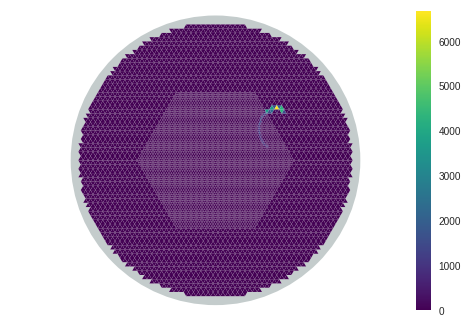

In [15]:
hits = np.zeros(10240)
for k, v in p6_evt.items():
    hits[k] += v.max()
        
fig, sm = pad_plot(hits, scale='linear', cmap='viridis')
plt.colorbar(sm)

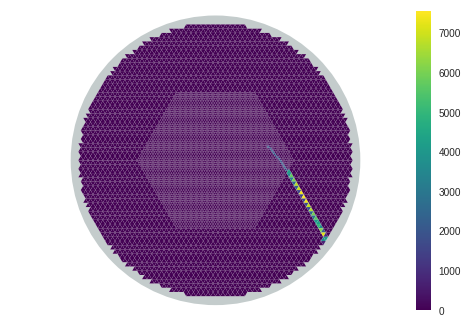

In [16]:
hits = np.zeros(10240)
for k, v in C1_evt.items():
    hits[k] += v.max()
        
fig, sm = pad_plot(hits, scale='linear', cmap='viridis')
plt.colorbar(sm)

In [17]:
# hits1 = np.zeros(10240)
# hits2 = np.zeros(10240)
# hits3 = np.zeros(10240)
# hits4 = np.zeros(10240)
# hits5 = np.zeros(10240)
# hits6 = np.zeros(10240)

# for k, v in p1_evt.items():
#     hits1[k] += v.max()
        
# fig1, sm1 = pad_plot(hits1, scale='linear', cmap='viridis')
# plt.colorbar(sm)
# ####################################################################################################################
# for k, v in p2_evt.items():
#     hits2[k] += v.max()
        
# fig2, sm2 = pad_plot(hits2, scale='linear', cmap='viridis')
# plt.colorbar(sm)

# ####################################################################################################################
# for k, v in p3_evt.items():
#     hits3[k] += v.max()
        
# fig3, sm3 = pad_plot(hits3, scale='linear', cmap='viridis')
# plt.colorbar(sm)

# ####################################################################################################################
# for k, v in p4_evt.items():
#     hits4[k] += v.max()
        
# fig4, sm4 = pad_plot(hits4, scale='linear', cmap='viridis')
# plt.colorbar(sm)

# ####################################################################################################################
# for k, v in p5_evt.items():
#     hits5[k] += v.max()
        
# fig5, sm5 = pad_plot(hits5, scale='linear', cmap='viridis')
# plt.colorbar(sm)

# ####################################################################################################################
# for k, v in p6_evt.items():
#     hits6[k] += v.max()
        
# fig6, sm6 = pad_plot(hits6, scale='linear', cmap='viridis')
# plt.colorbar(sm)

# #fig.savefig('/home/taylor/Documents/independent-research/event-gen/plots/protonTests.pdf')

In [18]:
# hits1 = np.zeros(10240)
# hits2 = np.zeros(10240)
# hits3 = np.zeros(10240)
# hits4 = np.zeros(10240)
# hits5 = np.zeros(10240)
# hits6 = np.zeros(10240)

# for k, v in C1_evt.items():
#     hits1[k] += v.max()
        
# fig1, sm1 = pad_plot(hits1, scale='linear', cmap='viridis')
# plt.colorbar(sm)
# ####################################################################################################################
# for k, v in C2_evt.items():
#     hits2[k] += v.max()
        
# fig2, sm2 = pad_plot(hits2, scale='linear', cmap='viridis')
# plt.colorbar(sm)

# ####################################################################################################################
# for k, v in C3_evt.items():
#     hits3[k] += v.max()
        
# fig3, sm3 = pad_plot(hits3, scale='linear', cmap='viridis')
# plt.colorbar(sm)

# ####################################################################################################################
# for k, v in C4_evt.items():
#     hits4[k] += v.max()
        
# fig4, sm4 = pad_plot(hits4, scale='linear', cmap='viridis')
# plt.colorbar(sm)

# ####################################################################################################################
# for k, v in C5_evt.items():
#     hits5[k] += v.max()
        
# fig5, sm5 = pad_plot(hits5, scale='linear', cmap='viridis')
# plt.colorbar(sm)

# ####################################################################################################################
# for k, v in C6_evt.items():
#     hits6[k] += v.max()
        
# fig6, sm6 = pad_plot(hits6, scale='linear', cmap='viridis')
# plt.colorbar(sm)

# #fig.savefig('/home/taylor/Documents/independent-research/event-gen/plots/protonTests.pdf')

In [19]:
#Convert to python events

#Proton
p1_pyevt = p_sim.convert_event(p1_evt)
p2_pyevt = p_sim.convert_event(p2_evt)
p3_pyevt = p_sim.convert_event(p3_evt)
p4_pyevt = p_sim.convert_event(p4_evt)
p5_pyevt = p_sim.convert_event(p5_evt)
p6_pyevt = p_sim.convert_event(p6_evt)

#Carbon
C1_pyevt = C_sim.convert_event(C1_evt)
C2_pyevt = C_sim.convert_event(C2_evt)
C3_pyevt = C_sim.convert_event(C3_evt)
C4_pyevt = C_sim.convert_event(C4_evt)
C5_pyevt = C_sim.convert_event(C5_evt)
C6_pyevt = C_sim.convert_event(C6_evt)

/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/evtdata.py:187: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(peak_data * range_idx, axis=-1) / peak_data.sum(axis=-1)


(-51.168351432481117,
 156.69540714455235,
 -15.771179349155172,
 176.08243433760367)

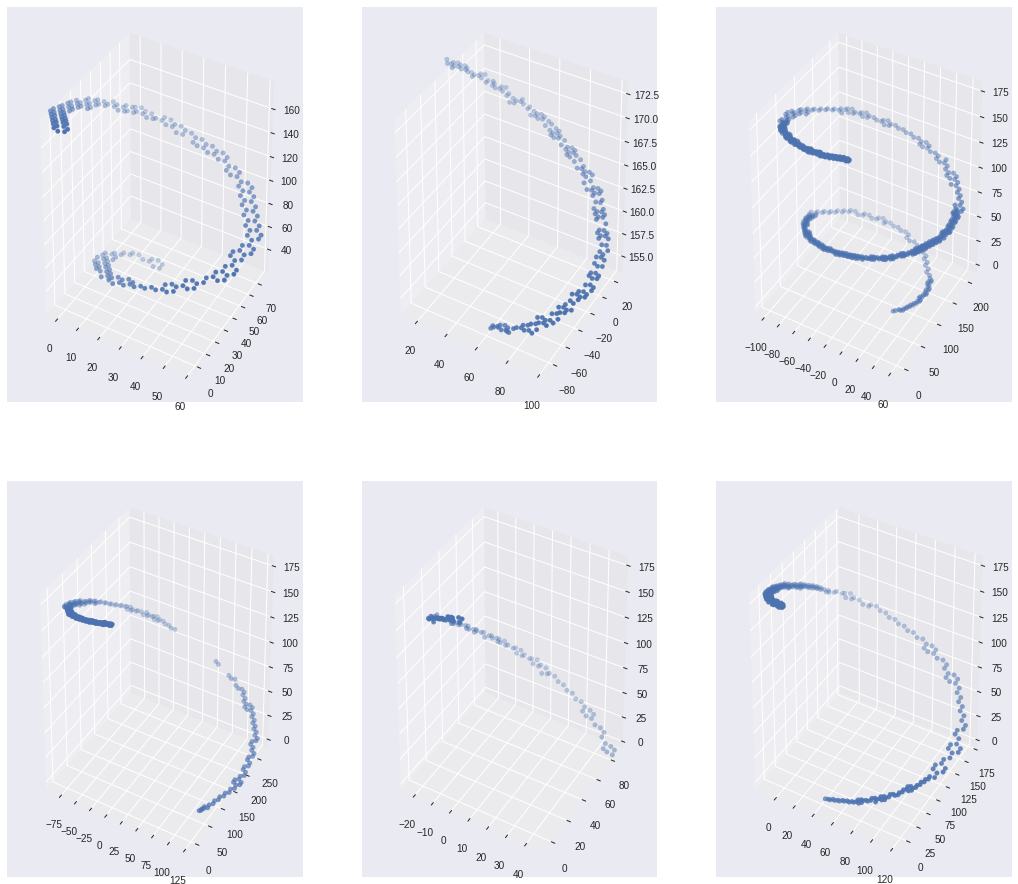

In [18]:
fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(2, 3, 1, projection='3d')

p1_xyzs = p1_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(p1_xyzs[:,0], p1_xyzs[:,1],p1_xyzs[:,2])
ax.axis('equal')

####################################################################################################################
ax = fig.add_subplot(2, 3, 2, projection='3d')

p2_xyzs = p2_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(p2_xyzs[:,0], p2_xyzs[:,1], p2_xyzs[:,2])
ax.axis('equal')

####################################################################################################################
ax = fig.add_subplot(2, 3, 3, projection='3d')

p3_xyzs = p3_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(p3_xyzs[:,0], p3_xyzs[:,1], p3_xyzs[:,2])
ax.axis('equal')

####################################################################################################################
ax = fig.add_subplot(2, 3, 4, projection='3d')

p4_xyzs = p4_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(p4_xyzs[:,0], p4_xyzs[:,1], p4_xyzs[:,2])
ax.axis('equal')

####################################################################################################################
ax = fig.add_subplot(2, 3, 5, projection='3d')

p5_xyzs = p5_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(p5_xyzs[:,0], p5_xyzs[:,1], p5_xyzs[:,2])
ax.axis('equal')

####################################################################################################################
ax = fig.add_subplot(2, 3, 6, projection='3d')

p6_xyzs = p6_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(p6_xyzs[:,0], p6_xyzs[:,1], p6_xyzs[:,2])
ax.axis('equal')

/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/evtdata.py:187: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(peak_data * range_idx, axis=-1) / peak_data.sum(axis=-1)


(-56.812821854289524,
 5.2763527856035637,
 -4.9252323816481107,
 41.83198721674836)

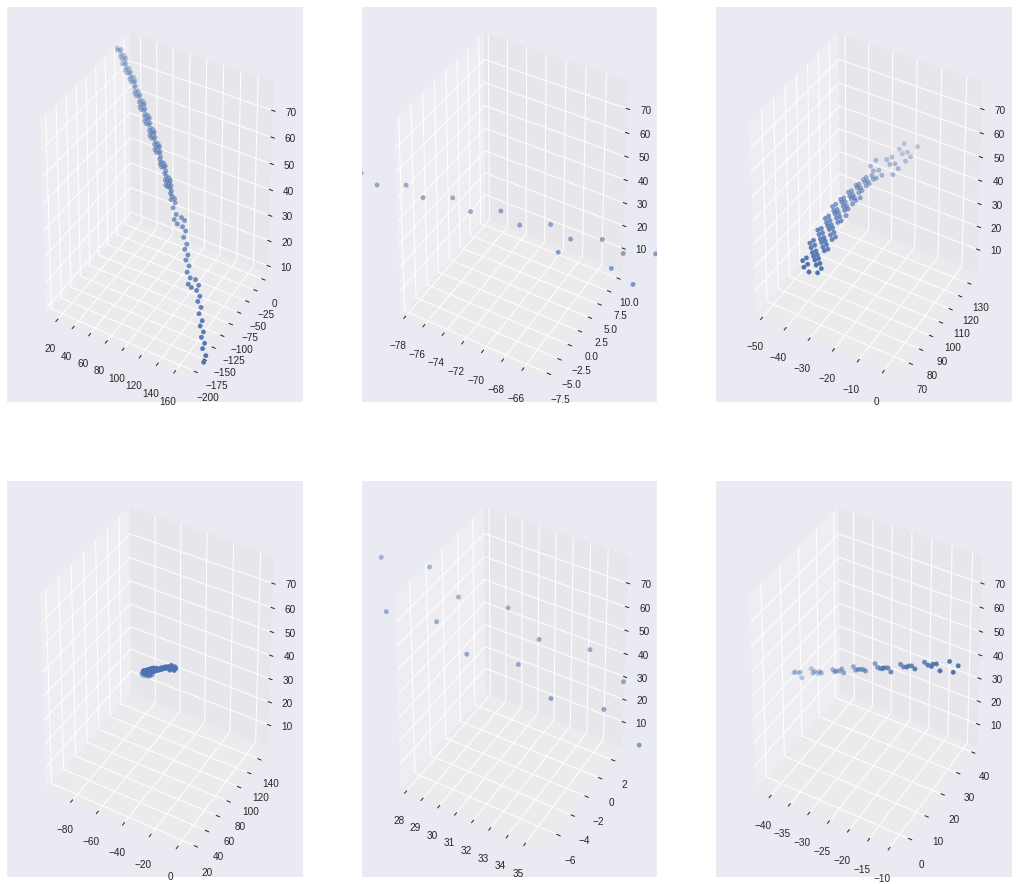

In [19]:
fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(2, 3, 1, projection='3d')

C1_xyzs = C1_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(C1_xyzs[:,0], C1_xyzs[:,1],C1_xyzs[:,2])
ax.axis('equal')

####################################################################################################################
ax = fig.add_subplot(2, 3, 2, projection='3d')

C2_xyzs = C2_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(C2_xyzs[:,0], C2_xyzs[:,1], C2_xyzs[:,2])
ax.axis('equal')

####################################################################################################################
ax = fig.add_subplot(2, 3, 3, projection='3d')

C3_xyzs = C3_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(C3_xyzs[:,0], C3_xyzs[:,1], C3_xyzs[:,2])
ax.axis('equal')

####################################################################################################################
ax = fig.add_subplot(2, 3, 4, projection='3d')

C4_xyzs = C4_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(C4_xyzs[:,0], C4_xyzs[:,1], C4_xyzs[:,2])
ax.axis('equal')

####################################################################################################################
ax = fig.add_subplot(2, 3, 5, projection='3d')

C5_xyzs = C5_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(C5_xyzs[:,0], C5_xyzs[:,1], C5_xyzs[:,2])
ax.axis('equal')

####################################################################################################################
ax = fig.add_subplot(2, 3, 6, projection='3d')

C6_xyzs = C6_pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax.scatter(C6_xyzs[:,0], C6_xyzs[:,1], C6_xyzs[:,2])
ax.axis('equal')